In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.1'

In [9]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [12]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing set
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [15]:
def plot_predictions(train_data = X_train, 
                     train_labels = y_train, 
                     test_data = X_test, 
                     test_labels = y_test, 
                     predictions = None):
    """Plot training data, test data and predictions if provided."""
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # Add predictions to plot if they are provided
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    # Show the legend
    plt.legend(prop={"size": 14})
    

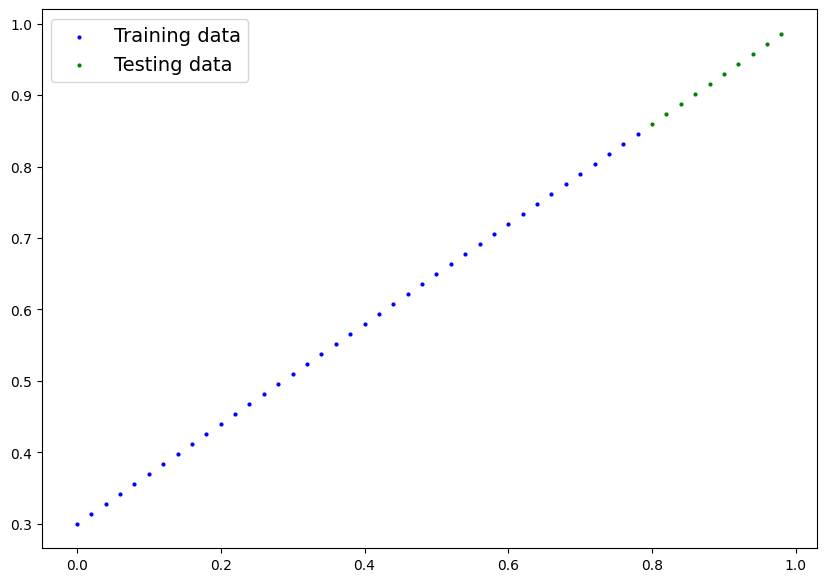

In [16]:
plot_predictions()

In [83]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                     requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                 requires_grad=True)
        
    # Forward method
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [84]:
torch.manual_seed(42)

# Instantiate the model
model_0 = LinearRegressionModel()

# check the nn.Parameter objects
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [85]:
with torch.inference_mode():
   y_preds = model_0(X_test)

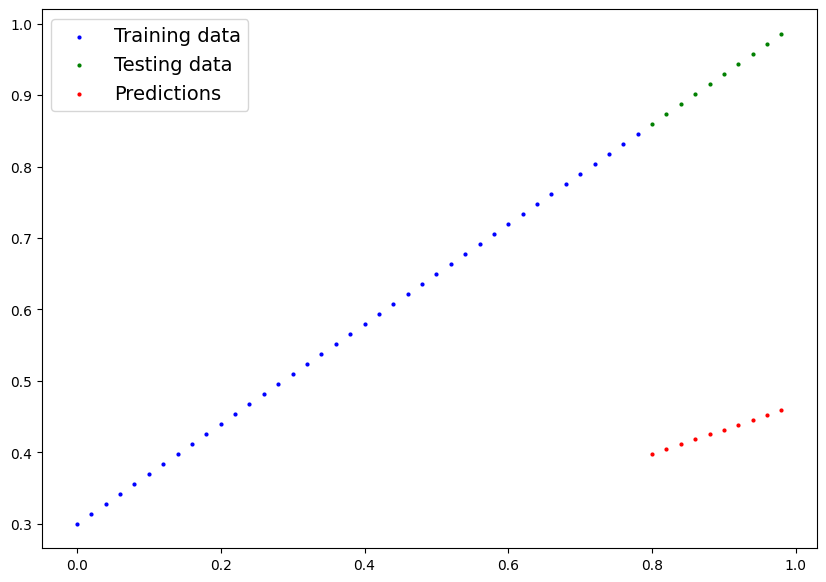

In [86]:
plot_predictions(predictions=y_preds)

## Train model

In [87]:
# Create a loss function
loss_fn = nn.L1Loss() # mean absolute error

# Create a optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [88]:
torch.manual_seed(42)

# set the number of epochs
epochs = 200

# Create empty loss lists to store the loss values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Set the model to training mode
    model_0.train()

    #1. Forward pass
    y_pred = model_0(X_train)
    #print(y_pred)

    #2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    #3. Zero all gradients
    optimizer.zero_grad()

    #4. Calculate gradients
    loss.backward()

    #5. Update weights
    optimizer.step()

    ### Testing

    # Set the model to evaluation mode
    model_0.eval()

    with torch.inference_mode():
        #1. Forward pass
        test_pred = model_0(X_test)

        #2. Calculate loss
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        # Print the loss values
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f'Epoch {epoch}: MAE Training loss: {loss}, MAE Test loss: {test_loss}')

Epoch 0: MAE Training loss: 0.31288138031959534, MAE Test loss: 0.48106518387794495
Epoch 10: MAE Training loss: 0.1976713240146637, MAE Test loss: 0.3463551998138428
Epoch 20: MAE Training loss: 0.08908725529909134, MAE Test loss: 0.21729660034179688
Epoch 30: MAE Training loss: 0.053148526698350906, MAE Test loss: 0.14464017748832703
Epoch 40: MAE Training loss: 0.04543796554207802, MAE Test loss: 0.11360953003168106
Epoch 50: MAE Training loss: 0.04167863354086876, MAE Test loss: 0.09919948130846024
Epoch 60: MAE Training loss: 0.03818932920694351, MAE Test loss: 0.08886633068323135
Epoch 70: MAE Training loss: 0.03476089984178543, MAE Test loss: 0.0805937647819519
Epoch 80: MAE Training loss: 0.03132382780313492, MAE Test loss: 0.07232122868299484
Epoch 90: MAE Training loss: 0.02788740023970604, MAE Test loss: 0.06473556160926819
Epoch 100: MAE Training loss: 0.024458957836031914, MAE Test loss: 0.05646304413676262
Epoch 110: MAE Training loss: 0.021020209416747093, MAE Test loss:

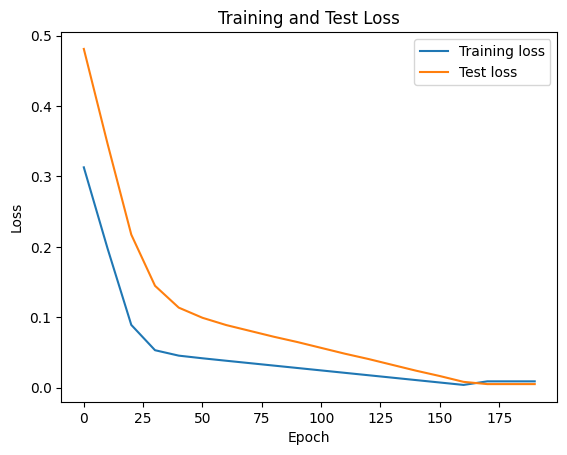

In [89]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label='Training loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend();

In [90]:
# Print our model's learned parameters
print("The model learned the following parameters: ")
print(model_0.state_dict())

print("\nTrue parameters: ")
print(f"weight: {weight}, bias: {bias}")

The model learned the following parameters: 
OrderedDict({'weights': tensor([0.6990]), 'bias': tensor([0.3093])})

True parameters: 
weight: 0.7, bias: 0.3


### Evaluation mode

In [91]:
#1. Set the model to evaluation mode
model_0.eval()

#2. Setup the inference mode
with torch.inference_mode():
    #3. Make predictions
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

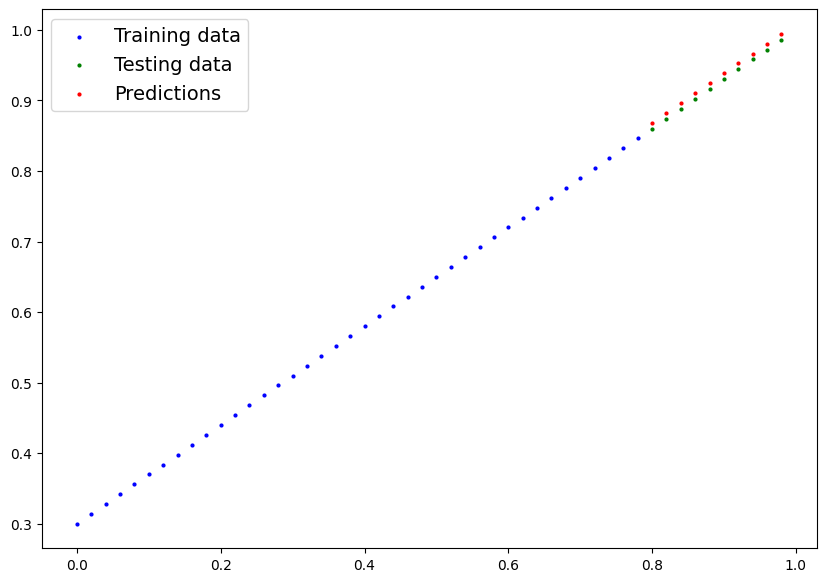

In [92]:
plot_predictions(predictions=y_preds)

### Save the model

In [96]:
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f"Saving model state dict at: {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model state dict at: models/01_pytorch_workflow_model_0.pth


In [98]:
# Check the saved file path
# MODEL_SAVE_PATH.exists()
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r--@ 1 abhishekmishra  staff  1680 Sep 25 13:14 models/01_pytorch_workflow_model_0.pth


### Load the model

In [99]:
# Instantiate a new instance of the model
loaded_model_0 = LinearRegressionModel()

# Load the model state dict
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

/var/folders/sz/gk2spb8j48nd7k74nz3bmv8w0000gn/T/ipykernel_88095/3397870236.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(MOD

<All keys matched successfully>

In [100]:
#1. Set the model to evaluation mode
loaded_model_0.eval()

#2. Setup the inference mode
with torch.inference_mode():
    #3. Make predictions
    loaded_model_predictions = loaded_model_0(X_test)

In [101]:
y_preds == loaded_model_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### Putting it all together

In [102]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.1'

In [103]:
# Setup device between mps, cuda and cpu
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
    
print(f"Using device: {device}")

Using device: mps


In [164]:
weight = 0.7
bias = 0.3

# Create data
start = 0 
stop = 1
step = 0.02
X = torch.arange(start, stop, step).unsqueeze(dim=1)
y = weight * X + bias

In [165]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [166]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

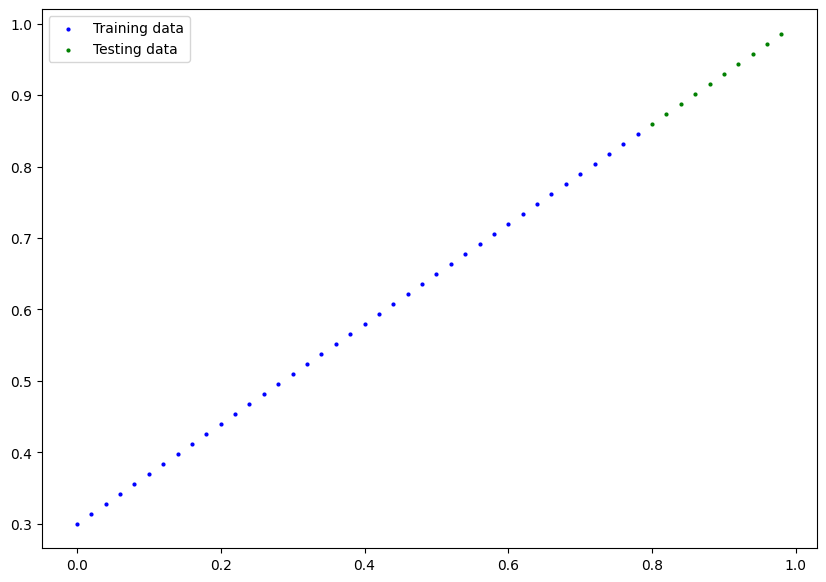

In [167]:
plot_predictions()

In [170]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [173]:
next(model_1.parameters()).device

device(type='cpu')

In [174]:
model_1.to(device)
next(model_1.parameters()).device

device(type='mps', index=0)

In [175]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.01)

In [176]:
torch.manual_seed(42)

epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.5551779270172119 | Test loss: 0.5739762783050537
Epoch: 100 | Train loss: 0.0062156799249351025 | Test loss: 0.014086711220443249
Epoch: 200 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 300 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 400 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 500 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 600 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 700 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 800 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904
Epoch: 900 | Train loss: 0.0012645028764382005 | Test loss: 0.013801807537674904


In [177]:
model_1.state_dict(), weight, bias

/Users/abhishekmishra/anaconda3/envs/DeepLearning/lib/python3.12/site-packages/torch/_tensor_str.py:138: UserWarning: MPS: nonzero op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Indexing.mm:335.)
  nonzero_finite_vals = torch.masked_select(


(OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='mps:0')),
              ('linear_layer.bias', tensor([0.3025], device='mps:0'))]),
 0.7,
 0.3)

In [178]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='mps:0')

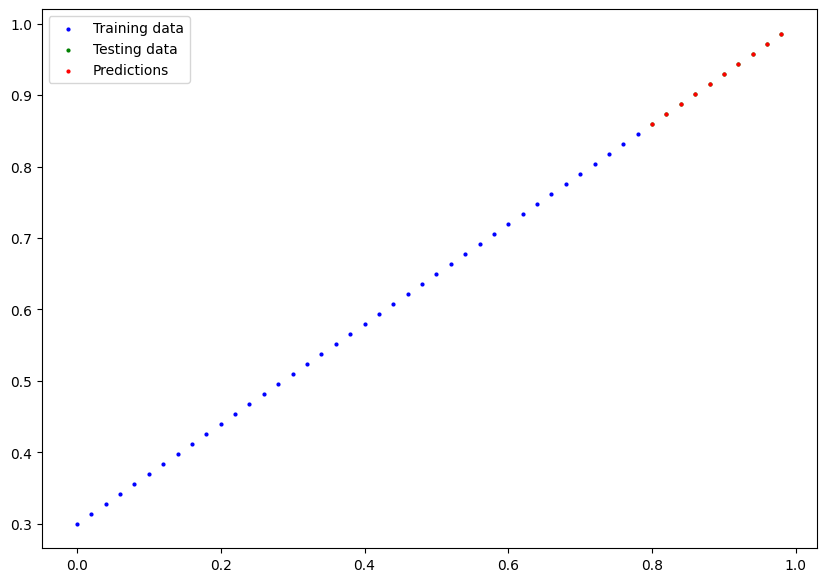

In [180]:
plot_predictions(predictions=y_preds.cpu())

In [182]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_PyTorch_WorkFlow.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

Saving the model to: models/01_PyTorch_WorkFlow.pth


In [184]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
mps:0


/var/folders/sz/gk2spb8j48nd7k74nz3bmv8w0000gn/T/ipykernel_88095/875263876.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODE

In [185]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_predictions = loaded_model_1(X_test)
y_preds == loaded_model_1_predictions

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='mps:0')